In [4]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Time taken for hyperparameter tuning and training: 19.74 seconds
Accuracy: 0.7545417010734929
Confusion Matrix:
[[1820  655]
 [ 534 1835]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      2475
           1       0.74      0.77      0.76      2369

    accuracy                           0.75      4844
   macro avg       0.76      0.75      0.75      4844
weighted avg       0.76      0.75      0.75      4844



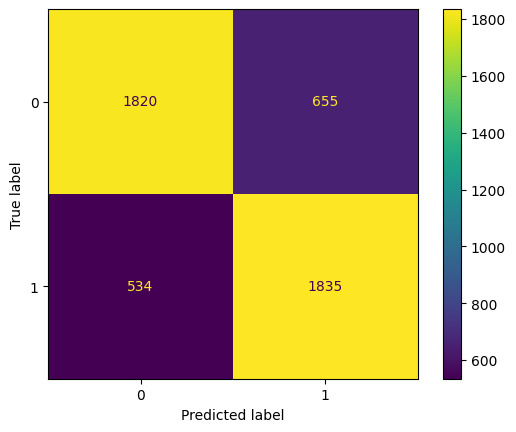

In [5]:
data = pd.read_csv('data/league_data_cleaned.csv')

# dropping the game ID column
X = data.drop(columns=[data.columns[0], 'blueWin'])
y = data['blueWin']

# normalizing the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# hyperparameter tuning
parameters = {
    'hidden_layer_sizes': [(2,), (5,), (10,), (20,)],
    'max_iter': [200, 300, 400],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

# defining the neural network model
mlp = MLPClassifier(random_state=1)
grid_search = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for hyperparameter tuning and training: {elapsed_time:.2f} seconds")


best_params = grid_search.best_params_

# defining the neural network model with the best hyperparameters
mlp_best = MLPClassifier(**best_params, random_state=1)

# training the model
mlp_best.fit(X_train, y_train)

# making predictions on the test set
y_pred = mlp_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()
